In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib notebook
%run ../quaternion.py

In [10]:
def vector_normalize(v):
    return v / np.linalg.norm(v)

def plot_vector(axes, *, position, direction, length=1., linewidth=1.0, linestyle='solid', color='r', alpha=1.):
    axes.quiver(position[0], position[1], position[2], direction[0], direction[1], direction[2], length=length, linewidth=linewidth, linestyle=linestyle, color=color, alpha=alpha)

def plot_basis(axes, *, length=1., linewidth=1.):
    org = np.zeros(3)
    plot_vector(axes, position=org, direction=np.array([1., 0., 0.]), length=length, linewidth=linewidth, linestyle='dashed', color='k')
    plot_vector(axes, position=org, direction=np.array([0., 1., 0.]), length=length, linewidth=linewidth, linestyle='dashed', color='k')
    plot_vector(axes, position=org, direction=np.array([0., 0., 1.]), length=length, linewidth=linewidth, linestyle='dashed', color='k')

def plot_sphere(axes, *, radius=1., color='r', alpha=1.):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
    axes.plot_surface(x, y, z,  rstride=4, cstride=4, color=color, alpha=alpha)

Rotate a Vector with a Quaternion.

<IPython.core.display.Javascript object>


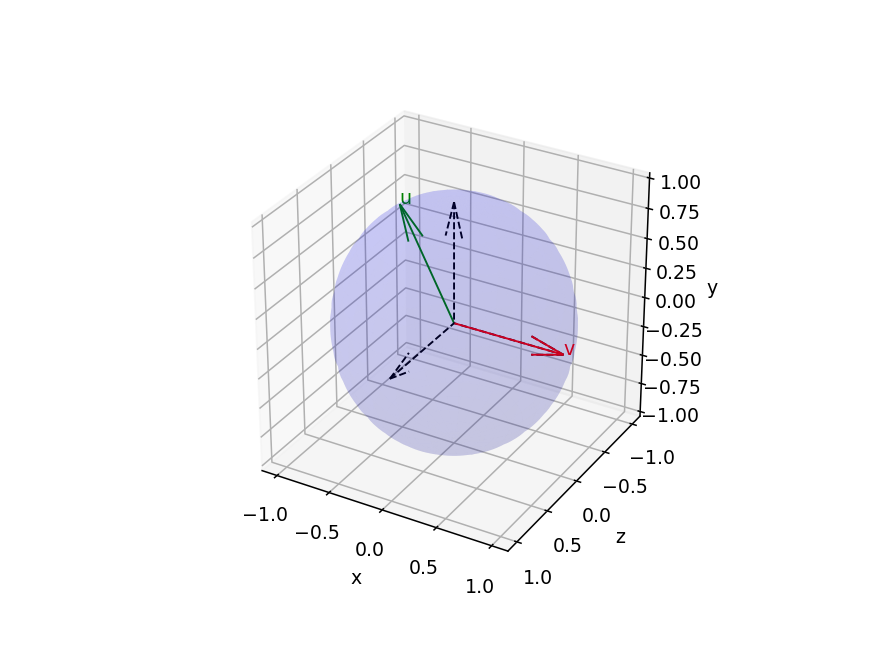

In [11]:
def plot1():
    q = Quaternion.from_axis_angle(np.array([0., 0., 1.]), math.radians(120.))
    v = np.array([1., 0., 0.])
    u = Quaternion.rotate(q, v)
    #
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1, projection='3d')

    plot_sphere(axes, color='b', alpha=0.1)
    plot_basis(axes)
    plot_vector(axes, position=np.zeros(3), direction=np.take(v, (0, 2, 1)), color='r')
    axes.text(v[0], v[2], v[1], 'v', color='r')
    plot_vector(axes, position=np.zeros(3), direction=np.take(u, (0, 2, 1)), color='g')
    axes.text(u[0], u[2], u[1], 'u', color='g')

    axes.set_aspect('equal', adjustable='box')
    axes.set_xlabel('x')
    axes.set_ylabel('z')
    axes.set_zlabel('y')
    axes.invert_yaxis()
    plt.show()

plot1()

Rotate a Vector with a multiple Quaternions.

<IPython.core.display.Javascript object>


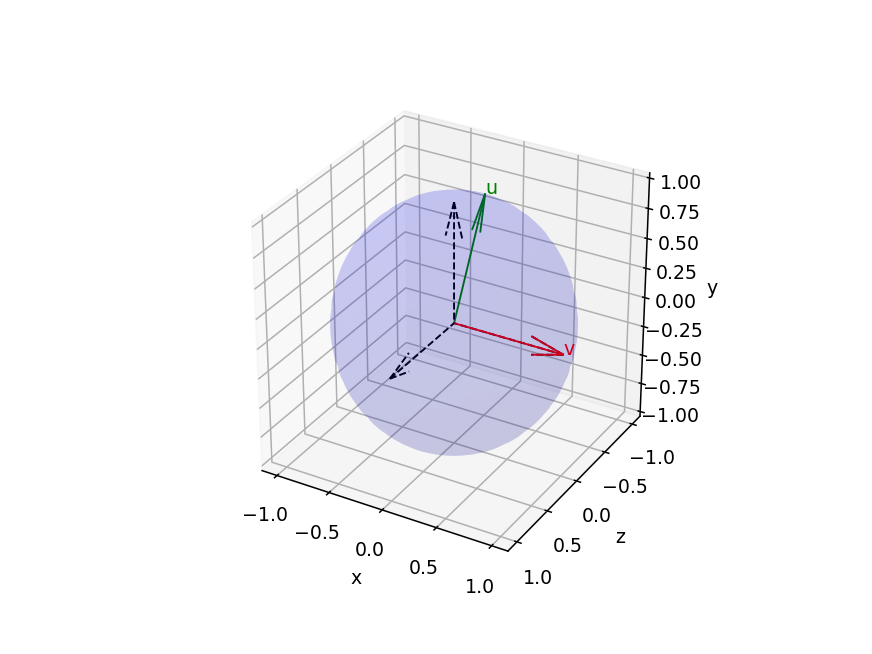

In [12]:
def plot2():
    r = Quaternion.from_axis_angle(np.array([0., 1., 0.]), math.radians(30.))
    q = Quaternion.from_axis_angle(np.array([0., 0., 1.]), math.radians(90.))
    p = q * r
    v = np.array([1., 0., 0.])
    u = Quaternion.rotate(p, v)
    #
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1, projection='3d')

    plot_sphere(axes, color='b', alpha=0.1)
    plot_basis(axes)
    plot_vector(axes, position=np.zeros(3), direction=np.take(v, (0, 2, 1)), color='r')
    axes.text(v[0], v[2], v[1], 'v', color='r')
    plot_vector(axes, position=np.zeros(3), direction=np.take(u, (0, 2, 1)), color='g')
    axes.text(u[0], u[2], u[1], 'u', color='g')

    axes.set_aspect('equal', adjustable='box')
    axes.set_xlabel('x')
    axes.set_ylabel('z')
    axes.set_zlabel('y')
    axes.invert_yaxis()
    plt.show()

plot2()